In [63]:
!pip install shapely
!pip install matplotlib
!pip install seaborn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 42.5 MB/s eta 0:00:00a 0:00:01


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
#Importar un archivo CSV

# Cargar el archivo CSV
df_csv = pd.read_csv("Charging_stations.csv")

# Mostrar las primeras filas del archivo importado
print(df_csv.head())

# Mostrar la estructura del DataFrame
print(df_csv.info())

# Mostrar un resumen estadístico de las variables numéricas
print(df_csv.describe())

                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV Other Info            

In [66]:
# Cargar el archivo CSV
df_vehicles = pd.read_csv("electric_vehicle_data.csv")

# Mostrar las primeras filas del archivo importado
print(df_csv.head())

                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV Other Info            

In [67]:
#Para ver si el Station Name aparece una única vez o varias veces
duplicados = df_csv[df_csv.duplicated(subset='Station Name', keep=False)]
print(duplicados)

                                        Station Name  \
8                                 Whole Foods Market   
13                                           CT RAIL   
34                                     UNION STATION   
80                                          FOXWOODS   
82                                          FOXWOODS   
84   Connecticut Welcome Center - Tesla Supercharger   
85                                Whole Foods Market   
91                                             NBCSG   
101                                      BIG Y FOODS   
102                                  WHOLE FOODS MKT   
105                                    UNION STATION   
112                                            NBCSG   
120                                            Big Y   
141                                          COMCAST   
143                                   Dunkin' Donuts   
153                              Wesleyan University   
158                                  WHOLE FOODS

/var/folders/fn/nmtj0m012q3drpdx2f9qwcg00000gn/T/ipykernel_24294/1262426174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df_csv, palette="Set2")


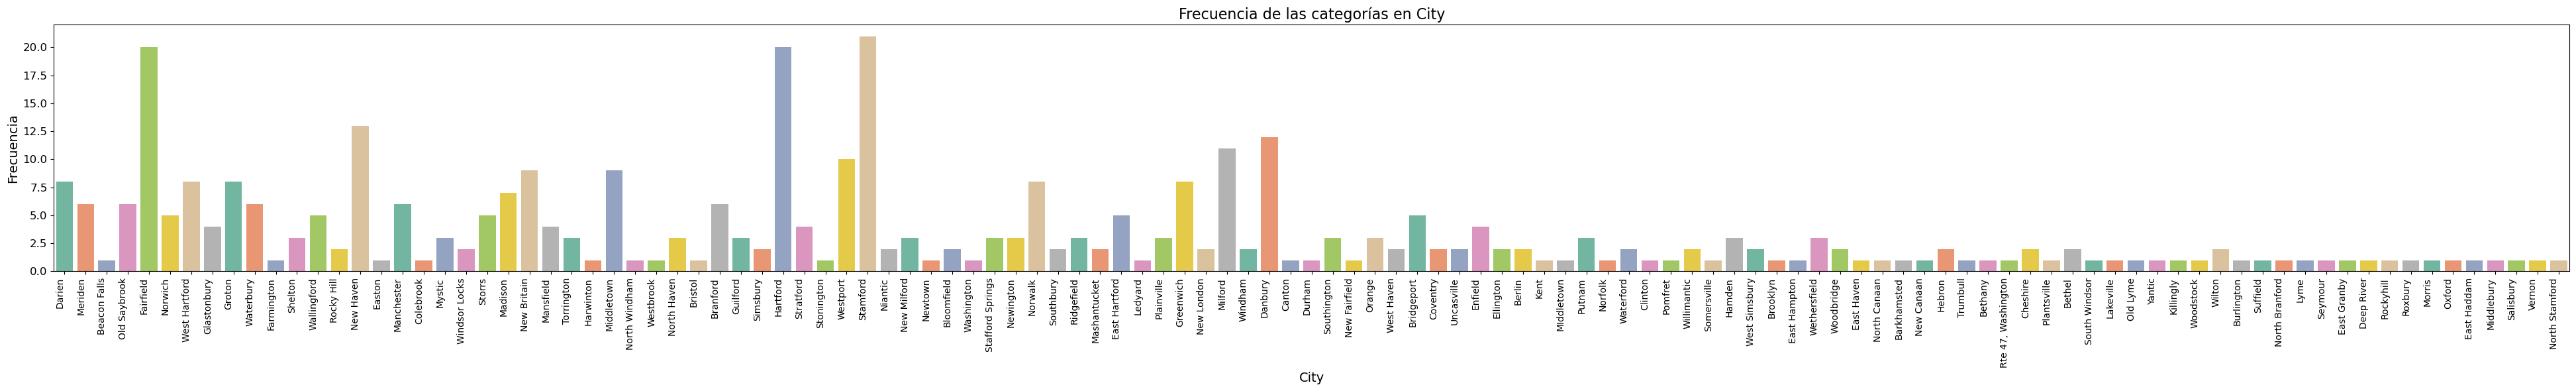

In [68]:
plt.figure(figsize=(max(12, len(df_csv['City'].unique()) // 3), 6))  # Tamaño dinámico
sns.countplot(x='City', data=df_csv, palette="Set2")

plt.title('Frecuencia de las categorías en City', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('City', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.tight_layout()
plt.show()


In [69]:
# Paso 1: Contar vehículos eléctricos por ciudad
ev_by_city = df_vehicles.groupby('City').size().reset_index(name='Electric Vehicles')

# Paso 2: Procesar los datos de estaciones de carga
df_csv['EV Level2 EVSE Num'] = pd.to_numeric(df_csv['EV Level2 EVSE Num'], errors='coerce').fillna(0)
df_csv['EV DC Fast Count'] = pd.to_numeric(df_csv['EV DC Fast Count'], errors='coerce').fillna(0)
df_csv['Total Chargers'] = df_csv['EV Level2 EVSE Num'] + df_csv['EV DC Fast Count']
chargers_by_city = df_csv.groupby('City')['Total Chargers'].sum().reset_index()

# Paso 3: Convertir Total Chargers a enteros
chargers_by_city['Total Chargers'] = chargers_by_city['Total Chargers'].astype(int)

# Paso 4: Unir ambos conjuntos de datos por ciudad
combined_df = pd.merge(ev_by_city, chargers_by_city, on='City')

# Paso 5: Mostrar la tabla resultante
print(combined_df)

          City  Electric Vehicles  Total Chargers
0   Bloomfield                  1               4
1   Bridgeport                  3              11
2     Brooklyn                  2               1
3   Burlington                301               2
4      Clinton                295               2
5       Easton                 23               2
6    Fairfield                  1              53
7   Farmington                  1               4
8       Groton                  1              14
9         Kent               4015               2
10     Madison                  3              36
11   Mansfield                  5               4
12  Middletown                  5              32
13      Mystic                  1               4
14   Newington                  1               9
15     Norfolk                  1               2
16     Norwich                  1              11
17    Old Lyme                  1               2
18  Ridgefield               1232               5


In [70]:
#Coger una ciudad al azar para ver si realmente está bien el número de cargadores eléctricos
fairfield_chargers = df_csv[df_csv['City'].str.lower() == 'kent']
print(fairfield_chargers)

       Station Name      Street Address  City Access Days Time  \
142  Kent Town Hall  41 Kent Green Blvd  Kent   24 hours daily   

    EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count EV Other Info  \
142               NONE                 2.0               0.0          NONE   

        New Georeferenced Column  Total Chargers  
142  POINT (-73.47251 41.727419)             2.0  


In [71]:
#Coger una ciudad al azar para ver si realmente está bien el número de vehículos
fairfield_cars = df_vehicles[df_vehicles['City'].str.lower() == 'kent']
print(fairfield_cars.count())

VIN (1-10)                                           4015
County                                               4015
City                                                 4015
State                                                4015
Postal Code                                          4015
Model Year                                           4015
Make                                                 4015
Model                                                4015
Electric Vehicle Type                                4015
Clean Alternative Fuel Vehicle (CAFV) Eligibility    4015
Electric Range                                       4015
Base MSRP                                            4015
Legislative District                                 4015
DOL Vehicle ID                                       4015
Vehicle Location                                     4015
Electric Utility                                     4015
2020 Census Tract                                    4015
dtype: int64


In [72]:
from scipy.stats import chi2_contingency

# Crear categorías para cada variable
combined_df['EV_cat'] = pd.cut(combined_df['Electric Vehicles'], bins=[-1, 10, 100, 1000, float('inf')],
                               labels=['Muy pocos', 'Pocos', 'Moderados', 'Muchos'])

combined_df['Chargers_cat'] = pd.cut(combined_df['Total Chargers'], bins=[-1, 5, 15, 50, float('inf')],
                                     labels=['Muy pocos', 'Pocos', 'Moderados', 'Muchos'])

# Crear tabla de contingencia
tabla = pd.crosstab(combined_df['EV_cat'], combined_df['Chargers_cat'])

# Aplicar prueba chi-cuadrado para estudiar la independencia de las variables
chi2, p, dof, expected = chi2_contingency(tabla)

print("Estadístico chi2:", chi2)
print("p-valor:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Interpretación
if p_value < 0.05:
    print("Existe relación entre el número de coches eléctricos y el número de estaciones de carga.")
else:
    print("No hay relación estadísticamente significativa entre el número de coches eléctricos y el número de estaciones de carga por ciudad.")

Estadístico chi2: 7.647058823529411
p-valor: 0.5700675230081539
Grados de libertad: 9
Frecuencias esperadas:
[[9.91666667 4.25       2.125      0.70833333]
 [1.16666667 0.5        0.25       0.08333333]
 [1.75       0.75       0.375      0.125     ]
 [1.16666667 0.5        0.25       0.08333333]]
